![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020 - Stephanie Beyer Diaz
# Statistical & Machine Learning Approaches for Marketing

## Homework 2

### Chapter 4

In [3]:
library(ISLR)
library(class)

In [4]:
#Exercise 6 (p. 170, Chap. 4)
B0 <- -6
B1 <- 0.05
B2 <- 1

#a.
hours <- 40
GPA <- 3.5

odds <- exp(B0 + B1*hours + B2*GPA)
Pr_y <- odds/(1+odds)
paste("Probability:",round(Pr_y*100,2),"%")


#b.
Pr_y <- 0.5
hours <- log(Pr_y/(1 - Pr_y))
hours <- (hours - B0)/B1
paste(hours, "hours")

[1] "Probability: 37.75 %"

[1] "120 hours"

In [5]:
#Exercise 8 (p. 170, Chap. 4)

# Logistic Regression: 20% train set error rate, 30% test set error rate
# KNN (k=1): average of 18% error rate

#For KNN with K=1, the training error rate is 0% because its nearest neighbor will be the response itself. 
#This means KNN has a test error rate of 36%, so logistic regression has a lower test error rate of 30% and is chosen.

In [6]:
#Exercise 9 (p. 170, Chap. 4)

#a.
odds = 0.37
pr = odds/(1+odds)
paste0(round(pr*100),"% of people will default on credit card payment")

#b. 
pr = 0.16
odds = pr/(1 - pr)
paste0("Odds that she will default are of ",round(odds*100),"%")

[1] "27% of people will default on credit card payment"

[1] "Odds that she will default are of 19%"

In [7]:
#Exercise 10 (p. 171, Chap. 4) 
weekly <- ISLR::Weekly
head(weekly)

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume    Today  Direction
1 1990  0.816  1.572 -3.936 -0.229 -3.484 0.1549760 -0.270 Down     
2 1990 -0.270  0.816  1.572 -3.936 -0.229 0.1485740 -2.576 Down     
3 1990 -2.576 -0.270  0.816  1.572 -3.936 0.1598375  3.514 Up       
4 1990  3.514 -2.576 -0.270  0.816  1.572 0.1616300  0.712 Up       
5 1990  0.712  3.514 -2.576 -0.270  0.816 0.1537280  1.178 Up       
6 1990  1.178  0.712  3.514 -2.576 -0.270 0.1544440 -1.372 Down

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

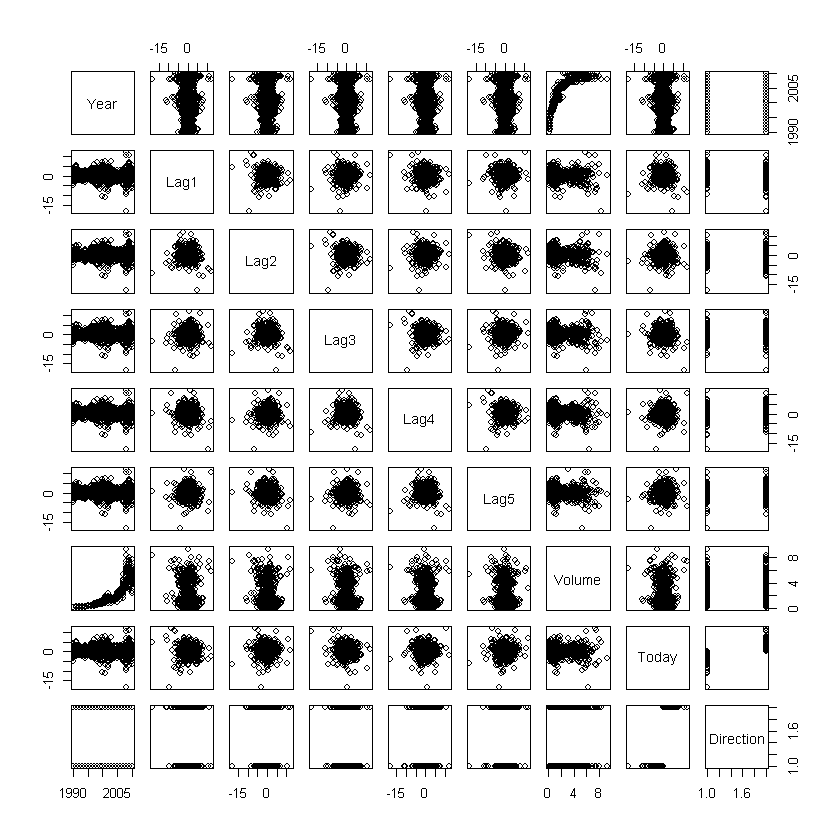

In [8]:
#a. There is a clear pattern between Year and Volume, with Volume increasing in time
summary(weekly)
pairs(weekly)

In [9]:
#Looking at correlation to explore variables
weekly$Direction <- ifelse(weekly$Direction=='Up',1,0)
cor(weekly)
head(weekly)

Year        Lag1         Lag2        Lag3        Lag4        
Year       1.00000000 -0.032289274 -0.03339001 -0.03000649 -0.031127923
Lag1      -0.03228927  1.000000000 -0.07485305  0.05863568 -0.071273876
Lag2      -0.03339001 -0.074853051  1.00000000 -0.07572091  0.058381535
Lag3      -0.03000649  0.058635682 -0.07572091  1.00000000 -0.075395865
Lag4      -0.03112792 -0.071273876  0.05838153 -0.07539587  1.000000000
Lag5      -0.03051910 -0.008183096 -0.07249948  0.06065717 -0.075675027
Volume     0.84194162 -0.064951313 -0.08551314 -0.06928771 -0.061074617
Today     -0.03245989 -0.075031842  0.05916672 -0.07124364 -0.007825873
Direction -0.02220025 -0.050003804  0.07269634 -0.02291281 -0.020549456
          Lag5         Volume      Today        Direction  
Year      -0.030519101  0.84194162 -0.032459894 -0.02220025
Lag1      -0.008183096 -0.06495131 -0.075031842 -0.05000380
Lag2      -0.072499482 -0.08551314  0.059166717  0.07269634
Lag3       0.060657175 -0.06928771 -0.071243639 -0.02291281
Lag4      -0.075675027 -0.06107462 -0.007825873 -0.02054946
Lag5       1.000000000 -0.05851741  0.011012698 -0.01816827
Volume    -0.058517414  1.00000000 -0.033077783 -0.01799521
Today      0.011012698 -0.03307778  1.000000000  0.72002470
Direction -0.018168272 -0.01799521  0.720024704  1.00000000

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume    Today  Direction
1 1990  0.816  1.572 -3.936 -0.229 -3.484 0.1549760 -0.270 0        
2 1990 -0.270  0.816  1.572 -3.936 -0.229 0.1485740 -2.576 0        
3 1990 -2.576 -0.270  0.816  1.572 -3.936 0.1598375  3.514 1        
4 1990  3.514 -2.576 -0.270  0.816  1.572 0.1616300  0.712 1        
5 1990  0.712  3.514 -2.576 -0.270  0.816 0.1537280  1.178 1        
6 1990  1.178  0.712  3.514 -2.576 -0.270 0.1544440 -1.372 0

In [10]:
#b. Lag2 is the only statistically significant variable
fit.glm <- glm(Direction ~ #Today + # commented because "glm.fit: algorithm did not converge"
               Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = weekly, family = binomial)
summary(fit.glm)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [11]:
#c. 
threshold <- 0.5
probs <- predict(fit.glm, type = "response")
count <- length(probs)
pred.glm <- rep(0, count)
pred.glm[probs > threshold] <- 1
table(pred.glm, weekly$Direction)

paste(round((54+557)/count*100,2),"% of correct predictions on training data")
paste(100-round((54+557)/count*100,2),"% of training error rate")

        
pred.glm   0   1
       0  54  48
       1 430 557

[1] "56.11 % of correct predictions on training data"

[1] "43.89 % of training error rate"

In [12]:
#d.
train <- (weekly$Year < 2009)
weekly_test <- weekly[!train, ]
direction_test <- weekly$Direction[!train]
fit.glm2 <- glm(Direction ~ Lag2, data = weekly, family = binomial, subset = train)
summary(fit.glm2)

probs2 <- predict(fit.glm2, weekly_test, type = "response")
pred.glm2 <- rep(0, length(probs2))
pred.glm2[probs2 > 0.5] <- 1
table(pred.glm2, direction_test)

paste("Correct predictions on test set:",round((9+56)/length(probs2)*100,2),"%")
paste("Test error rate:",100-round((9+56)/length(probs2)*100,2),"%")


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


         direction_test
pred.glm2  0  1
        0  9  5
        1 34 56

[1] "Correct predictions on test set: 62.5 %"

[1] "Test error rate: 37.5 %"

In [13]:
#e.
library(MASS)
fit.lda <- lda(Direction ~ Lag2, data = weekly, subset = train)
fit.lda

pred.lda <- predict(fit.lda, weekly_test)
table(pred.lda$class, direction_test)

Warning message:
"package 'MASS' was built under R version 3.6.2"

Call:
lda(Direction ~ Lag2, data = weekly, subset = train)

Prior probabilities of groups:
        0         1 
0.4477157 0.5522843 

Group means:
         Lag2
0 -0.03568254
1  0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

   direction_test
     0  1
  0  9  5
  1 34 56

In [14]:
#f. When the market goes up, the model is right 100% of the time vs right 0% of the time when the market goes down
fit.qda <- qda(Direction ~ Lag2, data = weekly, subset = train)
fit.qda

pred.qda <- predict(fit.qda, weekly_test)
table(pred.qda$class, direction_test)

Call:
qda(Direction ~ Lag2, data = weekly, subset = train)

Prior probabilities of groups:
        0         1 
0.4477157 0.5522843 

Group means:
         Lag2
0 -0.03568254
1  0.26036581

   direction_test
     0  1
  0  0  0
  1 43 61

In [15]:
#g. around 50% accuracy and error rate
library(class)
train_x <- as.matrix(weekly$Lag2[train])
test_x <- as.matrix(weekly$Lag2[!train])
train_direction <- weekly$Direction[train]
set.seed(1)
pred.knn <- knn(train_x, test_x, train_direction, k = 1)
table(pred.knn, direction_test)

        direction_test
pred.knn  0  1
       0 21 30
       1 22 31

In [16]:
#h. LDA and logistic regression have the smallest error rates, followed by QDA and KNN.

In [22]:
#i.
train <- (weekly$Year < 2009)
weekly_test <- weekly[!train, ]
weekly_train <- weekly[train, ]

train_Direction <- as.matrix(weekly_train$Direction)
set.seed(1245)
k_vals <- c(3,5,10,15)
preds <- c("Lag1","Lag2","Lag3","Lag4","Lag5")
for (i in k_vals){
    for (p in preds){
        train_X <- as.matrix(weekly_train[,preds])
        test_X <- as.matrix(weekly_test[,preds])
        knn.pred <- knn(train_X,test_X,train_Direction,k=5)
        print(paste("k:",i,",",p))
        print(table(knn.pred,weekly_test$Direction))}
}

[1] "k: 3 , Lag1"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 3 , Lag2"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 3 , Lag3"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 3 , Lag4"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 3 , Lag5"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 5 , Lag1"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 5 , Lag2"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 5 , Lag3"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 5 , Lag4"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 5 , Lag5"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 10 , Lag1"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 10 , Lag2"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 10 , Lag3"
        
knn.pred  0  1
       0 19 23
       1 24 38
[1] "k: 10 , Lag4"
        
knn.pred  0  1
       0 19 23
   

In [115]:
#Exercise 11 (p. 171, Chap. 4)
#a.
attach(Auto)
mpg01 <- rep(0, length(mpg))
mpg01[mpg > median(mpg)] <- 1
Auto <- data.frame(Auto, mpg01)

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



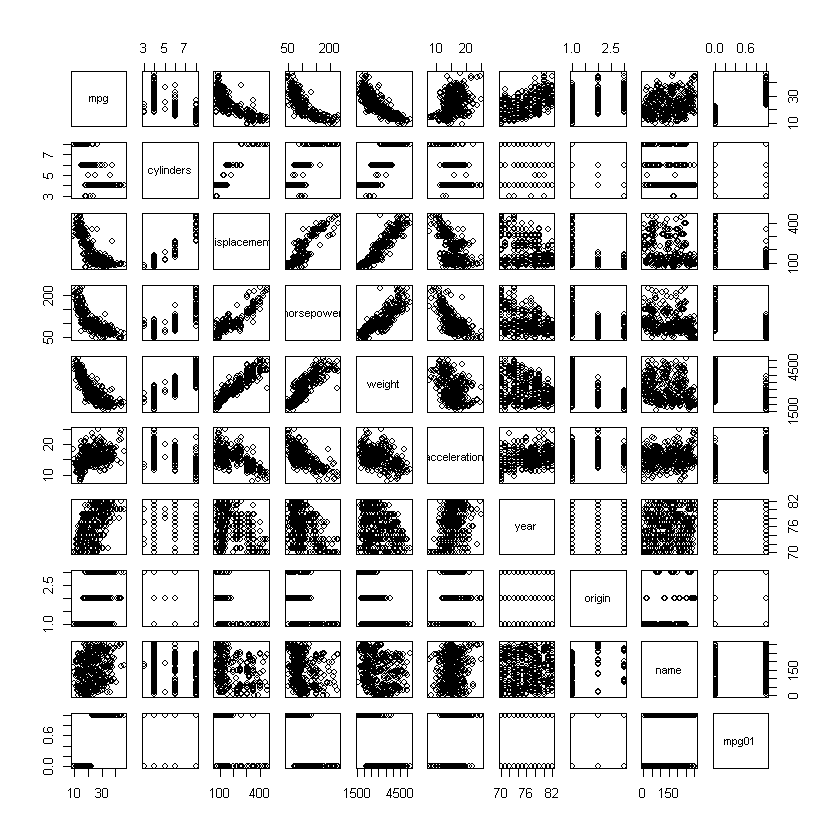

In [121]:
pairs(Auto)

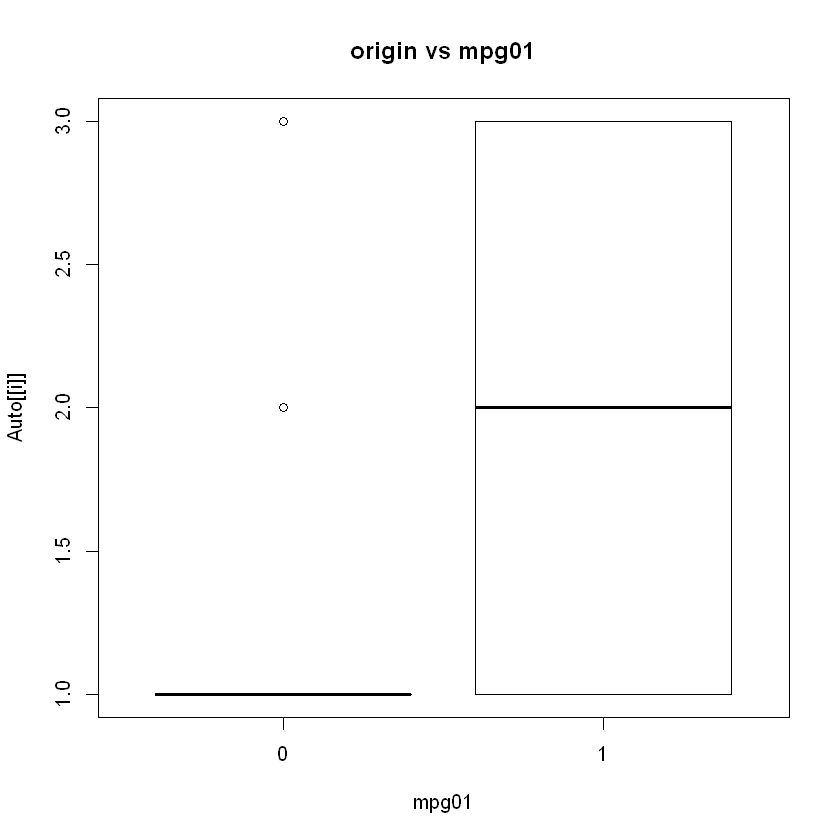

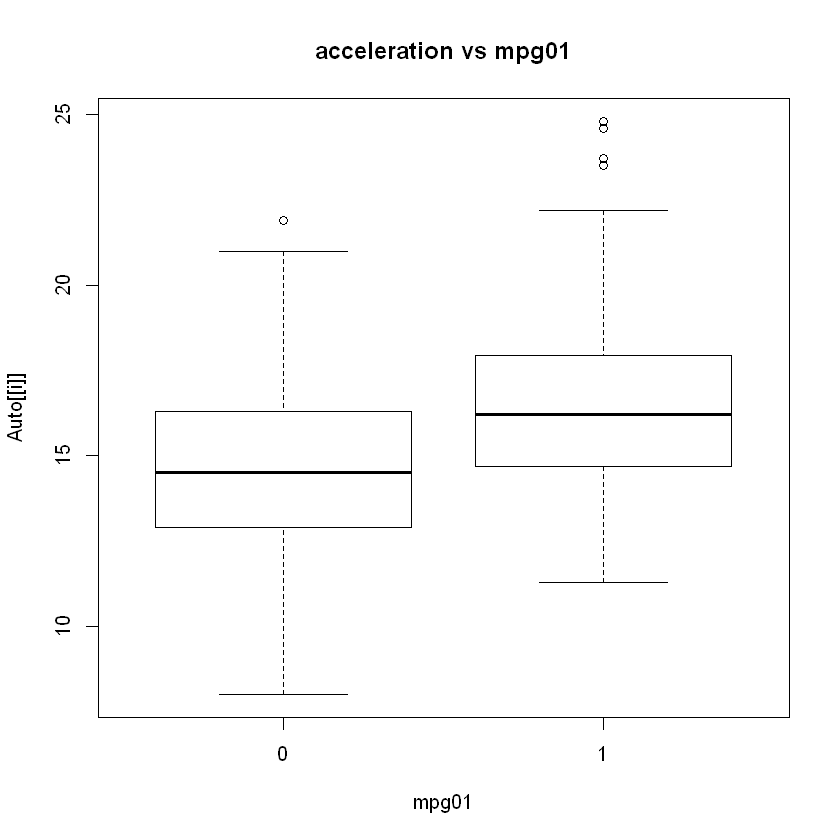

In [136]:
#Pair plots show a clearer association with “weight”, “displacement”, “horsepower”.
#“origin”, “cylinders” and “acceleration” may also be useful
vars <- c("weight","displacement","horsepower","origin","cylinders","acceleration")
for (i in vars)
    {     boxplot(Auto[[i]] ~ mpg01, data = Auto, main = paste0(i," vs mpg01"))}

In [144]:
#c.
train <- (Auto$year %% 2 == 0) #splitting more or less in half
a_train <- Auto[train, ]
a_test <- Auto[!train, ]
mpg01_test <- Auto$mpg01[!train]

[1] "10 10"

In [159]:
#d.
fit.lda <- lda(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, data = Auto, subset = train)
fit.lda

lda_pred <- predict(fit.lda, newdata = a_test)
print(table(lda_pred$class,mpg01_test))

acc <- mean(lda_pred$class == mpg01_test)
error_rate <- 1 - acc

paste0("Accuracy: ",round(acc*100,2),"%")
paste0("Test Error rate: " ,round(error_rate*100,2),"%")

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower + 
    acceleration, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower acceleration
0  6.812500 3604.823     271.7396  133.14583     14.47500
1  4.070175 2314.763     111.6623   77.92105     16.62895

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6825609783
weight       -0.0010554398
displacement  0.0001619815
horsepower    0.0038925740
acceleration -0.0273265018

   mpg01_test
     0  1
  0 86  8
  1 14 74


[1] "Accuracy: 87.91%"

[1] "Test Error rate: 12.09%"

In [162]:
#e.
fit.qda <- qda(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, data = Auto, subset = train)
fit.qda

pred.qda <- predict(fit.qda, a_test)
table(pred.qda$class, mpg01_test)

error <- mean(pred.qda$class != mpg01_test)
paste0("Test error rate: ",round(error*100,2),"%")

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower + 
    acceleration, data = Auto, subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower acceleration
0  6.812500 3604.823     271.7396  133.14583     14.47500
1  4.070175 2314.763     111.6623   77.92105     16.62895

   mpg01_test
     0  1
  0 88 12
  1 12 70

[1] "Test error rate: 13.19%"

In [163]:
#f.
fit.glm <- glm(mpg01 ~ cylinders + weight + displacement + horsepower + acceleration, 
               data = Auto, family = binomial, subset = train)
summary(fit.glm)

probs <- predict(fit.glm, a_test, type = "response")
pred.glm <- rep(0, length(probs))
pred.glm[probs > 0.5] <- 1
table(pred.glm, mpg01_test)

error <- mean(pred.glm != mpg01_test)
paste0("Test error rate: ",round(error*100,2),"%")


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower + 
    acceleration, family = binomial, data = Auto, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6447  -0.0300   0.1093   0.2772   2.4968  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  21.5252507  5.2710952   4.084 4.43e-05 ***
cylinders    -1.0514731  0.6606828  -1.591   0.1115    
weight       -0.0018981  0.0014644  -1.296   0.1949    
displacement -0.0009795  0.0155812  -0.063   0.9499    
horsepower   -0.0759966  0.0355423  -2.138   0.0325 *  
acceleration -0.2253047  0.2140185  -1.053   0.2925    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.577  on 209  degrees of freedom
Residual deviance:  82.141  on 204  degrees of freedom
AIC: 94.141

Number of Fisher Scoring iterations: 8


        mpg01_test
pred.glm  0  1
       0 89 11
       1 11 71

[1] "Test error rate: 12.09%"

In [182]:
#g.
train_X <- Auto[train,c("cylinders", "weight", "displacement", "horsepower", "acceleration")]
test_X <- Auto[!train,c("cylinders", "weight", "displacement", "horsepower", "acceleration")]
train_mpg01 <- Auto$mpg01[train]
set.seed(1)
for (k in c(1,5,10,15,25,50,100,150,200))
    {pred.knn <- knn(train_X, test_X, train_mpg01, k = k)
    table(pred.knn, mpg01_test)
    error <- mean(pred.knn != mpg01_test)
    print(paste0("Test error rate: ",round(error*100,2),"% for k=",k))
    }
#k=25 may be preferable because of simplicity

[1] "Test error rate: 15.38% for k=1"
[1] "Test error rate: 14.84% for k=5"
[1] "Test error rate: 15.38% for k=10"
[1] "Test error rate: 15.93% for k=15"
[1] "Test error rate: 14.29% for k=25"
[1] "Test error rate: 14.84% for k=50"
[1] "Test error rate: 14.29% for k=100"
[1] "Test error rate: 18.68% for k=150"
[1] "Test error rate: 54.95% for k=200"
